<a href="https://colab.research.google.com/github/OKleg/CV_labs/blob/main/CV_lab5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Выполнить улучшение изображения по описанию (Гонсалес п.3.8 или 3.7 (зависит от года издания))

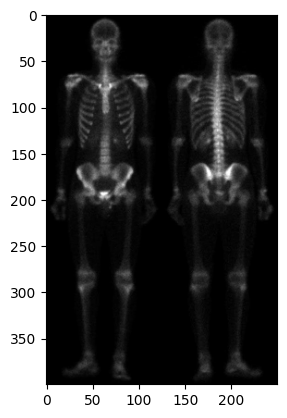

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
def loading(path):
    return cv2.imread(path, cv2.IMREAD_REDUCED_COLOR_2)
image = loading("skeleton.jpg")
plt.imshow(image)
plt.show()

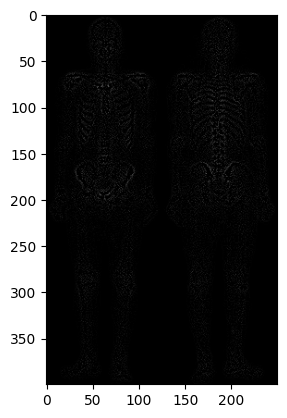

In [ ]:

#blur = cv2.GaussianBlur(image,(3,3),0)



# Apply Laplacian operator in some higher datatype
laplacian = cv2.Laplacian(image,cv2.CV_64F)
res= np.clip(laplacian, a_min=0,a_max=255).astype(np.uint8)
plt.imshow(res)

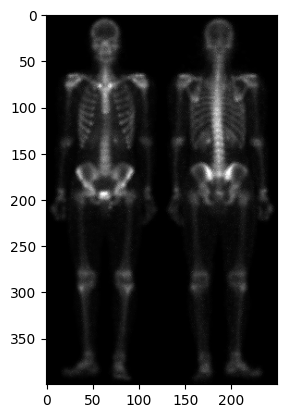

In [ ]:
laplas = cv2.add(image,res)
plt.imshow(laplas)

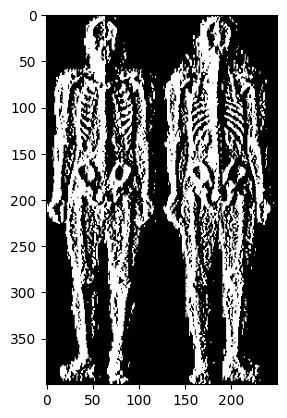

In [ ]:
sobelx = cv2.Sobel(image,cv2.CV_64F,dx=1,dy=0)
#sobelx = np.clip(sobelx, a_min=0, a_max=255).astype(np.uint8)
plt.imshow(sobelx)

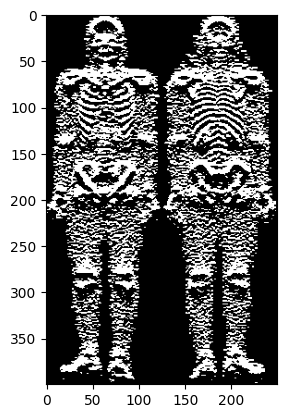

In [ ]:
sobely = cv2.Sobel(image,cv2.CV_64F,dx=0,dy=1)
#sobely = np.clip(sobely, a_min=0, a_max=255).astype(np.uint8)
plt.imshow(sobely)

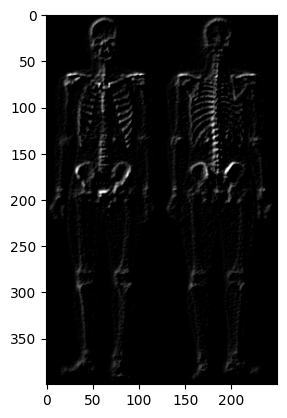

In [ ]:
sobel = cv2.addWeighted(sobelx,0.5,sobely,0.5,0)
sobel = np.clip(sobel, a_min=0, a_max=255).astype(np.uint8)
plt.imshow(sobel)

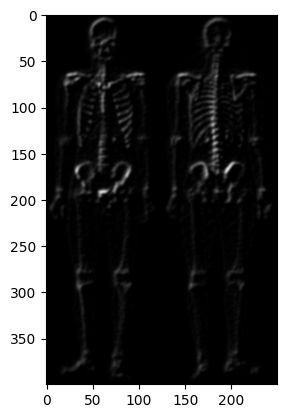

In [ ]:
blur = cv2.GaussianBlur(sobel,(5,5),0)
plt.imshow(blur)

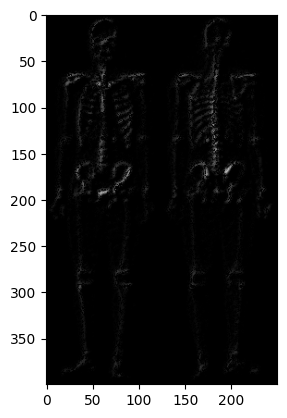

In [ ]:
pictE = cv2.bitwise_and(laplas,blur)
plt.imshow(pictE)

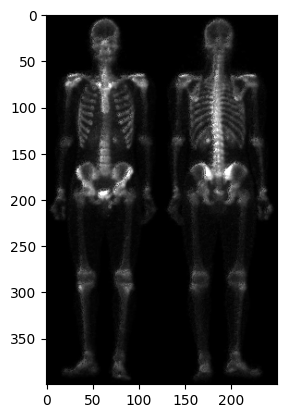

In [ ]:
pictZh = cv2.add(image,pictE)
plt.imshow(pictZh)

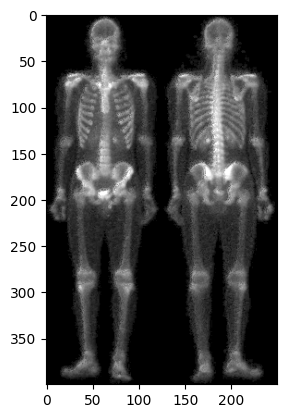

In [ ]:
gamma = 0.5

pictZ = np.power(pictZh/255.0,gamma)
pictZ = np.uint8(pictZ*255.0)

plt.imshow(pictZ)